In [52]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from catboost import CatBoostClassifier

In [53]:
train_data = pd.read_csv('../pre_data/pre_training.csv')
train_data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_deck,cabin_num,cabin_side
0,0001_01,Europa,0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0.0,P
1,0002_01,Earth,0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0.0,S
2,0003_01,Europa,0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0.0,S
3,0003_02,Europa,0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0.0,S
4,0004_01,Earth,0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,55 Cancri e,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,A,98.0,P
8689,9278_01,Earth,1,PSO J318.5-22,18.0,0.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,G,1499.0,S
8690,9279_01,Earth,0,TRAPPIST-1e,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,G,1500.0,S
8691,9280_01,Europa,0,55 Cancri e,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,E,608.0,S


In [54]:
test_data = pd.read_csv('../pre_data/pre_test.csv')
test_data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,cabin_deck,cabin_num,cabin_side
0,0013_01,Earth,1,TRAPPIST-1e,27.0,0.0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3.0,S
1,0018_01,Earth,0,TRAPPIST-1e,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4.0,S
2,0019_01,Europa,1,55 Cancri e,31.0,0.0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0.0,S
3,0021_01,Europa,0,TRAPPIST-1e,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1.0,S
4,0023_01,Earth,0,TRAPPIST-1e,20.0,0.0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,1,TRAPPIST-1e,34.0,0.0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,G,1496.0,S
4273,9269_01,Earth,0,TRAPPIST-1e,42.0,0.0,0.0,847.0,17.0,10.0,144.0,Matty Scheron,G,1044.0,S
4274,9271_01,Mars,1,55 Cancri e,26.0,0.0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,D,296.0,P
4275,9273_01,Europa,0,55 Cancri e,26.0,0.0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,D,297.0,P


In [55]:
for df in [train_data, test_data]:
    df["VIP"] = df["VIP"].astype(str).str.lower().map({
        "true": 1.0,
        "false": 0.0,
        "1": 1.0,
        "0": 0.0,
        "1.0": 1.0,
        "0.0": 0.0
    }).fillna(0.0).astype(float)

In [56]:
train_data = train_data.drop(columns='Name')
test_data = test_data.drop(columns='Name')

### Feature Engineering

---

In [57]:
# ---------- TOTAL SPENDING ----------
train_data["TotalSpent"] = (
    train_data["RoomService"] +
    train_data["FoodCourt"] +
    train_data["ShoppingMall"] +
    train_data["Spa"] +
    train_data["VRDeck"]
)

test_data["TotalSpent"] = (
    test_data["RoomService"] +
    test_data["FoodCourt"] +
    test_data["ShoppingMall"] +
    test_data["Spa"] +
    test_data["VRDeck"]
)



In [58]:
train_data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,cabin_deck,cabin_num,cabin_side,TotalSpent
0,0001_01,Europa,0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,B,0.0,P,0.0
1,0002_01,Earth,0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1,F,0.0,S,736.0
2,0003_01,Europa,0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0,A,0.0,S,10383.0
3,0003_02,Europa,0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0,A,0.0,S,5176.0
4,0004_01,Earth,0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1,F,1.0,S,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,55 Cancri e,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,0,A,98.0,P,8536.0
8689,9278_01,Earth,1,PSO J318.5-22,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0,G,1499.0,S,0.0
8690,9279_01,Earth,0,TRAPPIST-1e,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,1,G,1500.0,S,1873.0
8691,9280_01,Europa,0,55 Cancri e,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,0,E,608.0,S,4637.0


In [59]:
psg_id = train_data['PassengerId']
train_data = train_data.drop(columns='PassengerId')

In [60]:
y = train_data['Transported']
X = train_data.drop(columns='Transported')
bool_cols = X.select_dtypes(include='bool').columns
for col in bool_cols:
    X[col] = X[col].astype(int)


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.195, stratify=y, random_state=42)
cat_features = ["HomePlanet", "Destination", "cabin_deck", "cabin_side"]

for col in cat_features:
    X_train[col] = X_train[col].astype(str).fillna("Missing")
    X_test[col]  = X_test[col].astype(str).fillna("Missing")

In [62]:
model = CatBoostClassifier(
    iterations=2300,
    learning_rate=0.017,
    depth=6,
    random_state=42,
    auto_class_weights='Balanced',
    l2_leaf_reg=3,
    bagging_temperature=1,
    border_count=254,
    loss_function='Logloss',
    eval_metric='AUC',
)

In [63]:
model.fit(X_train, y_train, cat_features=cat_features, verbose=True)

0:	total: 19.7ms	remaining: 45.4s
1:	total: 38.7ms	remaining: 44.5s
2:	total: 57.7ms	remaining: 44.2s
3:	total: 75.9ms	remaining: 43.6s
4:	total: 95.4ms	remaining: 43.8s
5:	total: 119ms	remaining: 45.7s
6:	total: 155ms	remaining: 50.7s
7:	total: 188ms	remaining: 53.9s
8:	total: 210ms	remaining: 53.4s
9:	total: 230ms	remaining: 52.6s
10:	total: 251ms	remaining: 52.2s
11:	total: 268ms	remaining: 51.2s
12:	total: 287ms	remaining: 50.5s
13:	total: 304ms	remaining: 49.6s
14:	total: 320ms	remaining: 48.7s
15:	total: 335ms	remaining: 47.8s
16:	total: 350ms	remaining: 47s
17:	total: 364ms	remaining: 46.2s
18:	total: 381ms	remaining: 45.7s
19:	total: 398ms	remaining: 45.4s
20:	total: 413ms	remaining: 44.8s
21:	total: 429ms	remaining: 44.4s
22:	total: 443ms	remaining: 43.9s
23:	total: 459ms	remaining: 43.5s
24:	total: 474ms	remaining: 43.1s
25:	total: 490ms	remaining: 42.8s
26:	total: 520ms	remaining: 43.7s
27:	total: 538ms	remaining: 43.7s
28:	total: 563ms	remaining: 44.1s
29:	total: 581ms	rema

In [64]:
model.score(X_test, y_test)

np.float64(0.8183962264150944)

In [65]:
X_test = test_data.copy()
passenger_ids = X_test["PassengerId"]
X_test = X_test.drop(columns=["PassengerId"])
for col in cat_features:
    X_test[col] = X_test[col].astype(str).fillna("Missing")

In [66]:
preds = model.predict(X_test)

In [67]:
submission = pd.DataFrame({
    "PassengerId": passenger_ids,
    "Transported": preds.astype(bool)
})
submission.to_csv("submission.csv", index=False)

         feature  importance
11     cabin_num   11.203941
8            Spa   11.138092
0     HomePlanet   10.455091
10    cabin_deck    9.954136
9         VRDeck    9.247355
13    TotalSpent    8.725815
3            Age    7.529563
6      FoodCourt    7.143651
5    RoomService    6.603392
1      CryoSleep    5.401210
7   ShoppingMall    4.761868
12    cabin_side    4.154141
2    Destination    3.501763
4            VIP    0.179982


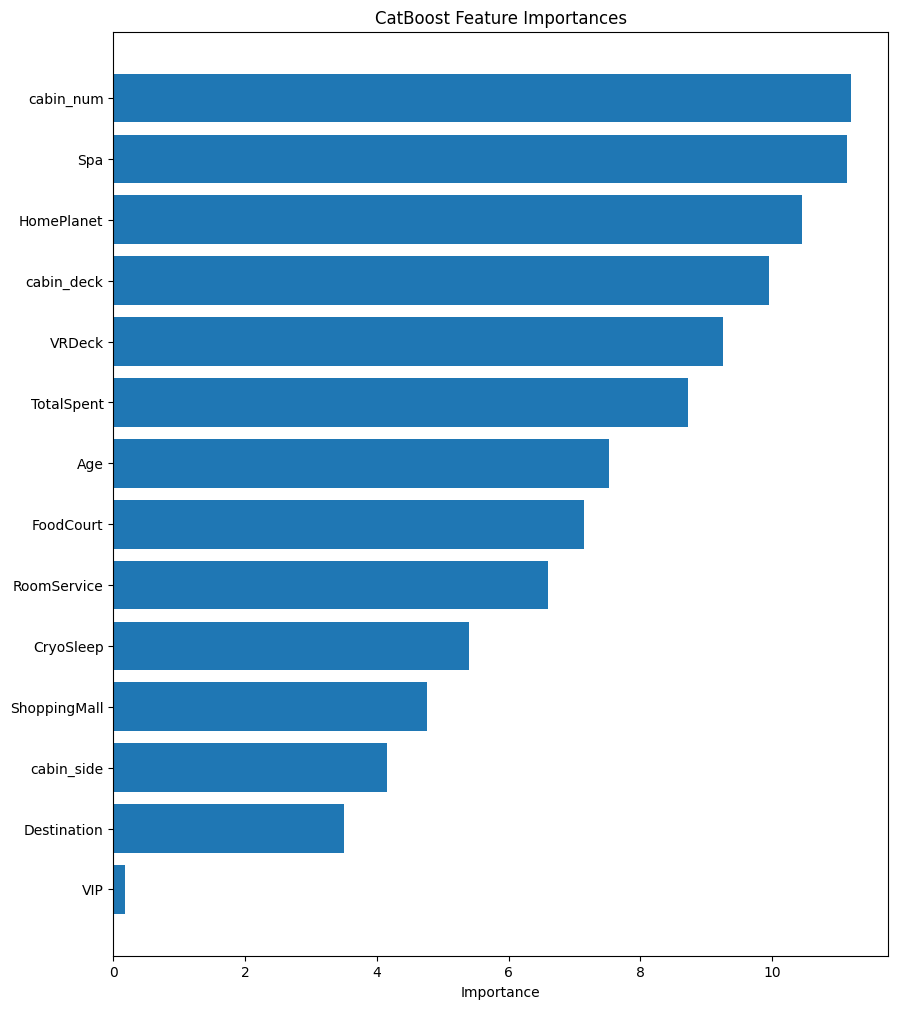

In [68]:


# Вземаме важностите
importances = model.get_feature_importance()
feature_names = X_train.columns

# Създаваме DataFrame
fi_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

# Показваме таблицата
print(fi_df)

# Графика (по избор)
plt.figure(figsize=(10, 12))
plt.barh(fi_df["feature"], fi_df["importance"])
plt.gca().invert_yaxis()
plt.title("CatBoost Feature Importances")
plt.xlabel("Importance")
plt.show()